In [2]:
import os

In [3]:
data_dir = 'C:\\Users\\kateb\\OneDrive\\Υπολογιστής\\cell_images\\cell_images'

In [4]:
os.listdir(data_dir)

['test', 'train']

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from matplotlib.image import imread

In [7]:
test_path = data_dir+'\\test\\'
train_path = data_dir+'\\train\\'

In [8]:
test_path

'C:\\Users\\kateb\\OneDrive\\Υπολογιστής\\cell_images\\cell_images\\test\\'

In [9]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [10]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [11]:
os.listdir(train_path+'parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [12]:
para_cell = train_path+'parasitized\\'+'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [13]:
para_cell

'C:\\Users\\kateb\\OneDrive\\Υπολογιστής\\cell_images\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

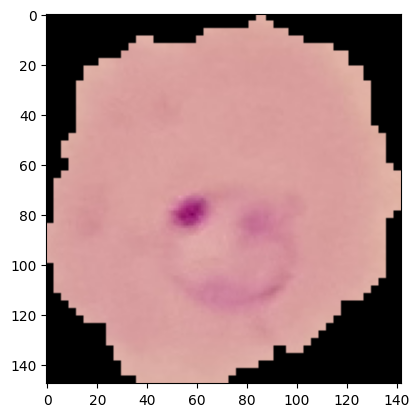

In [14]:
plt.imshow(imread(para_cell))

In [15]:
os.listdir(train_path+'uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [16]:
uninf_cell = train_path+'uninfected\\'+'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [17]:
uninf_cell

'C:\\Users\\kateb\\OneDrive\\Υπολογιστής\\cell_images\\cell_images\\train\\uninfected\\C100P61ThinF_IMG_20150918_144104_cell_128.png'

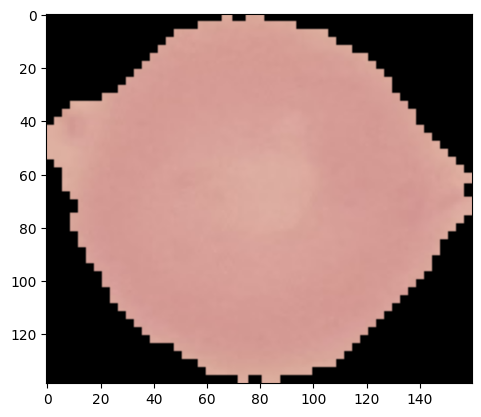

In [18]:
plt.imshow(imread(uninf_cell))

In [19]:
#len(os.listdir(test_path+'parasitized'))

In [20]:
#len(os.listdir(test_path+'uninfected'))

In [21]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'uninfected'):
    
    img = imread(test_path+'uninfected\\'+image_filename)
    d1, d2, colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

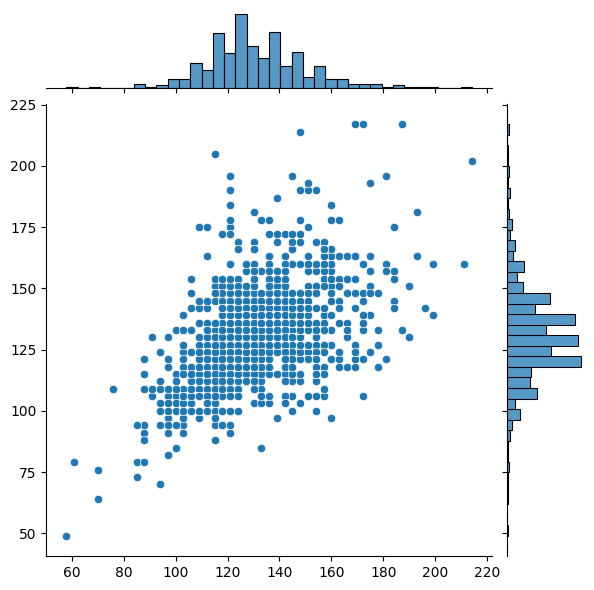

In [22]:
sns.jointplot(x=dim1,y=dim2)

In [23]:
np.mean(dim1)

130.92538461538462

In [24]:
np.mean(dim2)

130.75

In [25]:
image_shape = (130,130,3)

In [26]:
130*130*3

50700

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [28]:
#help(ImageDataGenerator)

In [29]:
image_gen = ImageDataGenerator(rotation_range=20, 
                               width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest')

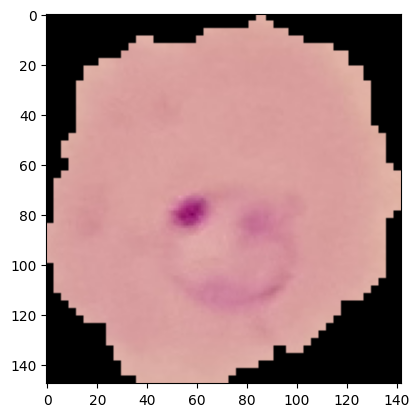

In [30]:
para_img = imread(para_cell)
uninf_img = imread(uninf_cell)
plt.imshow(para_img)

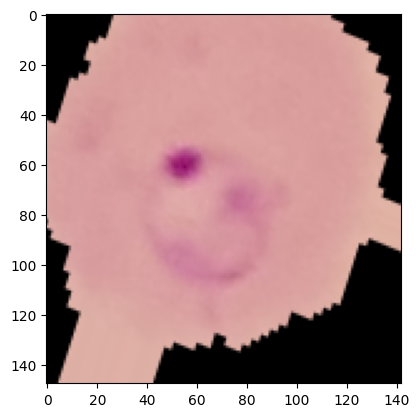

In [31]:
plt.imshow(image_gen.random_transform(para_img))

In [32]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [33]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [35]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), 
                 input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), 
                 input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), 
                 input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [39]:
batch_size = 16

In [40]:
train_image_gen = image_gen.flow_from_directory(train_path, 
                                                target_size=image_shape[:2], 
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary') 

Found 24958 images belonging to 2 classes.


In [41]:
test_image_gen = image_gen.flow_from_directory(test_path, 
                                               target_size=image_shape[:2], 
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                               shuffle=False) 

Found 2600 images belonging to 2 classes.


In [42]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [43]:
results = model.fit_generator(train_image_gen, epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

C:\Users\kateb\AppData\Local\Temp\ipykernel_22020\2917627547.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen, epochs=20,


Epoch 1/20
1560/1560 [==============================] - 344s 219ms/step - loss: 0.5439 - accuracy: 0.6966 - val_loss: 0.1949 - val_accuracy: 0.9338
Epoch 2/20
1560/1560 [==============================] - 369s 236ms/step - loss: 0.1790 - accuracy: 0.9442 - val_loss: 0.1704 - val_accuracy: 0.9446
Epoch 3/20
1560/1560 [==============================] - 361s 231ms/step - loss: 0.1673 - accuracy: 0.9491 - val_loss: 0.1598 - val_accuracy: 0.9527
Epoch 4/20
1560/1560 [==============================] - 328s 210ms/step - loss: 0.1615 - accuracy: 0.9493 - val_loss: 0.1835 - val_accuracy: 0.9250
Epoch 5/20
1560/1560 [==============================] - 329s 211ms/step - loss: 0.1599 - accuracy: 0.9491 - val_loss: 0.1556 - val_accuracy: 0.9477
Epoch 6/20
1560/1560 [==============================] - 329s 211ms/step - loss: 0.1567 - accuracy: 0.9505 - val_loss: 0.1670 - val_accuracy: 0.9458
Epoch 7/20
1560/1560 [==============================] - 327s 210ms/step - loss: 0.1522 - accuracy: 0.9506 - val_

In [44]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

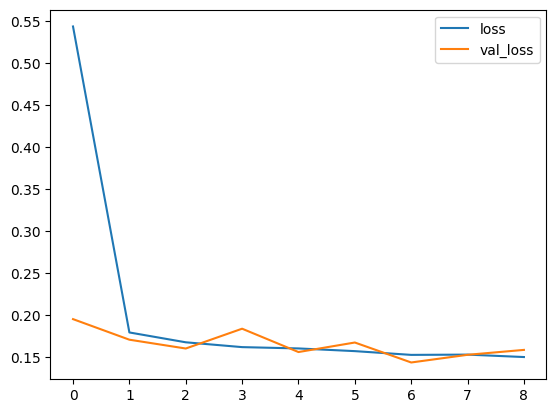

In [45]:
losses[['loss','val_loss']].plot()

In [46]:
model.metrics_names

['loss', 'accuracy']

In [47]:
model.evaluate_generator(test_image_gen)

C:\Users\kateb\AppData\Local\Temp\ipykernel_22020\4011314882.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_image_gen)


[0.15646693110466003, 0.9465384483337402]

In [48]:
from tensorflow.keras.preprocessing import image

In [61]:
pred =  (model.predict(test_image_gen) > 0.5).astype("float32")

163/163 [==============================] - 16s 88ms/step


In [65]:
len(pred)

2600

In [63]:
predictions = pred>0.5

In [64]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [66]:
from sklearn.metrics import classification_report, confusion_matrix

In [67]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [68]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1300
           1       0.94      0.95      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



In [69]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1215,   85],
       [  60, 1240]], dtype=int64)

In [72]:
my_image = image.load_img(para_cell, target_size=image_shape)

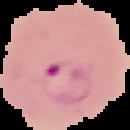

In [73]:
my_image

In [74]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [75]:
my_img_arr = image.img_to_array(my_image)

In [79]:
my_img_arr.shape

(130, 130, 3)

In [80]:
my_img_arr = np.expand_dims(my_img_arr, axis=0)

In [83]:
my_img_arr.shape

(1, 130, 130, 3)

In [85]:
model.predict(my_img_arr)

1/1 [==============================] - 3s 3s/step


array([[0.]], dtype=float32)

In [86]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}